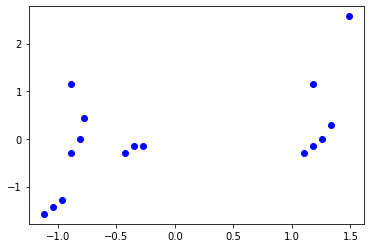

Final centroids:  [[-1.03961426 -1.43039708]
 [ 0.71936527  0.33375932]
 [-0.83886116  0.32183934]]
Finalgroups:  {0: [array([-1.11609163, -1.57343679]), array([-1.03961426, -1.43039708]), array([-0.96313689, -1.28735737])], 2: [array([-0.88665952, -0.28607942]), array([-0.88665952,  1.14431766]), array([-0.77194346,  0.42911912]), array([-0.81018215,  0.        ]), array([-0.42779529, -0.28607942]), array([-0.35131792, -0.14303971]), array([-0.27484055, -0.14303971])], 1: [array([ 1.10175212, -0.28607942]), array([ 1.1782295 , -0.14303971]), array([1.25470687, 0.        ]), array([1.33118424, 0.28607942]), array([1.1782295 , 1.14431766]), array([1.48413898, 2.57471474])]}


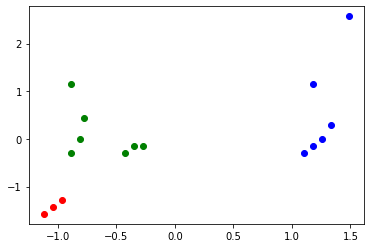

In [3]:
#K means clustering
import numpy as np
import matplotlib.pyplot as plt

def EuclideanDistance(new_point, datasetX):
  sum_squares=[]
  for i in range(0, len(new_point)):
    sum_squares.append((new_point[i]-datasetX[i])**2);
  sum_squares=np.asarray(sum_squares)
  ans=np.sqrt(np.sum(sum_squares))
  return ans

#Standardization performed
def feature_scaling(on_this_array):
  if(len(on_this_array.shape)==2):
    on_this_array=on_this_array.astype(np.double)
    for i in range(0, len(on_this_array[0])):
        meanValue=np.mean(on_this_array[:,i])
        stdValue=np.std(on_this_array[:,i])
        on_this_array[:,i]=(on_this_array[:,i]-meanValue)/stdValue
  else:
    meanValue=np.mean(on_this_array)
    stdValue=np.std(on_this_array)
    on_this_array[:]=(on_this_array[:]-meanValue)/stdValue
  return on_this_array

#Plotting the results
def plot_graph(plot_on_x, plot_on_y, typeOfGraph, col):
  from matplotlib.pyplot import figure
  figure(figsize=(3, 3))
  if(typeOfGraph=='line'):
    plt.plot(plot_on_x, plot_on_y, color=col)
    scale_factor = 1

    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()

    plt.xlim(xmin * scale_factor, xmax * scale_factor)
    plt.ylim(ymin * scale_factor, ymax * scale_factor)
    plt.show()
  else:
    #plt.scatter(plot_on_x[0], plot_on_y[0], color=col[0])
    for i in range(0, len(plot_on_x)):
      plt.scatter(plot_on_x[i], plot_on_y[i], color=col[i])
    plt.show()


'''x=[
   [1,1], [2,2],[3,3],[4,4],[10,10],[11,12],[13,14],[12,15]
]'''

x=[
   [1,1],[2,2],[3,3],[4,10],[4,20],[5.5,15],[5,12],[10,10],[11,11],[12,11],[30,10], [31,11], [32,12], [33,14],[31,20],[35,30]
]
x=np.asarray(x)
x=feature_scaling(x)
plot_x=np.asarray(x)
plt.scatter(plot_x[:,0],plot_x[:,1], color="blue")
plt.show()

#Getting k centroids
k=3
centroids=[]
dist=[]
groups={}
flag=0

centroids.append(x[0])
centroids.append(x[7])
centroids.append(x[3])
centroids=np.asarray(centroids)
centroids=centroids.astype(np.double)
#print("Initially groups is: ", groups)
#print("Chosen centroids: ", centroids)

#Get distance for all the points from each centroid
while(flag==0):
  for j in range(0, len(x)):
    for i in range(0, k):
      get_dist=EuclideanDistance(centroids[i], x[j])
      dist.append(get_dist)
  
    group_number=dist.index(np.min(dist))
    #Make a dict of groups, indexed by cluster number containing list of chosen points for that cluster
    if(group_number in groups.keys()):
         temp=groups[group_number]
         temp.append(x[j])
         groups[group_number]=temp
         
    else:
        temp=[]
        temp.append(x[j])
        groups[group_number]=temp
        
    dist=[]
  #Centroid update step
  for key, value in groups.items():
    value=np.asarray(value)
    value=value.astype(np.double)
    #If the update is trivial, stop iterations
    if(np.max(np.abs(centroids[key]-np.mean(value, axis=0)))>0.05):
      centroids[key]=np.mean(value, axis=0)
    else:
      flag=1
      break

    
  if(flag==1):
    break
  groups={}

print("Final centroids: ", centroids)
print("Finalgroups: ", groups)

col=['red', 'green', 'blue', 'pink','orange','purple','brown']
pos=0
for key, values in groups.items():
  x=np.asarray(values)
  plt.scatter(x[:,0], x[:,1], color=col[pos])
  pos=(pos+1)%4

plt.show()
